In [3]:
import mpmath
import numpy as np
import matplotlib.pyplot as plt
import time
import math

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
# 坐标轴的刻度设置向内(in)或向外(out)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Find the polynomial coefficients for triangle Hofstadter model
# with vector potential Ay=(p/q)*2pi*x and non-Hermitian term delta
# with momentum in y direction ky
def pk(p,q,delta,ky):
    # brute forcely calculate pk for k=1,2,3,4
    mpmath.dps = 50
    A = (mpmath.mpf(1) + delta)/(mpmath.mpf(1) - delta)
    B = (mpmath.mpf(1) - delta)/(mpmath.mpf(1) + delta)
    if q == 1:
        T = 2+A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky))+B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        V = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
            mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        poly = [1,-V]
        poly_init = [1,-V]
        return poly,T,poly_init
    elif q == 2:
        Tq = [0] * (q + 1)
        Vq = [0] * (q + 1)
        Vq[1] = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        Vq[2] = mpmath.sqrt(A)*mpmath.exp(-1j*(4*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(4*mpmath.pi*(p/q)-ky))
        Tq[1] = 2 + A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        Tq[2] = 2 + A*mpmath.exp(1j*(5*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(5*mpmath.pi*(p/q)-ky))
        T = Tq[1]*Tq[2]
        poly = [1,-Vq[1]-Vq[2],-Tq[1]-Tq[2]+Vq[1]*Vq[2]]
        poly_init = [1,-Vq[1]-Vq[2],-Tq[1]+Vq[1]*Vq[2]]
        return poly,T,poly_init
    elif q == 3:
        Tq = [0] * (q + 1)
        Vq = [0] * (q + 1)
        Vq[1] = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        Vq[2] = mpmath.sqrt(A)*mpmath.exp(-1j*(4*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(4*mpmath.pi*(p/q)-ky))
        Vq[3] = mpmath.sqrt(A)*mpmath.exp(-1j*(6*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(6*mpmath.pi*(p/q)-ky))
        Tq[1] = 2 + A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        Tq[2] = 2 + A*mpmath.exp(1j*(5*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(5*mpmath.pi*(p/q)-ky))
        Tq[3] = 2 + A*mpmath.exp(1j*(7*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(7*mpmath.pi*(p/q)-ky))
        T = Tq[1]*Tq[2]*Tq[3]
        poly = [1,-Vq[1]-Vq[2]-Vq[3],-Tq[1]-Tq[2]-Tq[3]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[2]*Vq[3],Tq[1]*Vq[3]+Tq[2]*Vq[1]+Tq[3]*Vq[2]]
        poly_init = [1,-Vq[1]-Vq[2]-Vq[3],-Tq[1]-Tq[2]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[2]*Vq[3],Tq[1]*Vq[3]+Tq[2]*Vq[1]-Vq[1]*Vq[2]*Vq[3]]
        return poly,T,poly_init
    elif q == 4:
        Tq = [0] * (q + 1)
        Vq = [0] * (q + 1)
        Vq[1] = mpmath.sqrt(A)*mpmath.exp(-1j*(2*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(2*mpmath.pi*(p/q)-ky))
        Vq[2] = mpmath.sqrt(A)*mpmath.exp(-1j*(4*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(4*mpmath.pi*(p/q)-ky))
        Vq[3] = mpmath.sqrt(A)*mpmath.exp(-1j*(6*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(6*mpmath.pi*(p/q)-ky))
        Vq[4] = mpmath.sqrt(A)*mpmath.exp(-1j*(8*mpmath.pi*(p/q)-ky))+ \
                mpmath.sqrt(B)*mpmath.exp(1j*(8*mpmath.pi*(p/q)-ky))
        Tq[1] = 2 + A*mpmath.exp(1j*(3*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(3*mpmath.pi*(p/q)-ky))
        Tq[2] = 2 + A*mpmath.exp(1j*(5*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(5*mpmath.pi*(p/q)-ky))
        Tq[3] = 2 + A*mpmath.exp(1j*(7*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(7*mpmath.pi*(p/q)-ky))
        Tq[4] = 2 + A*mpmath.exp(1j*(9*mpmath.pi*(p/q)-ky)) + \
                B*mpmath.exp(-1j*(9*mpmath.pi*(p/q)-ky))
        T = Tq[1]*Tq[2]*Tq[3]*Tq[4]
        poly = [mpmath.mpc(0)] * (q + 1)
        poly[0] = 1
        poly[1] = -Vq[1]-Vq[2]-Vq[3]-Vq[4]
        poly[2] = -Tq[1]-Tq[2]-Tq[3]-Tq[4]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[1]*Vq[4]+Vq[2]*Vq[3]+Vq[2]*Vq[4]+Vq[3]*Vq[4]
        poly[3] = Tq[1]*(Vq[3]+Vq[4])+Tq[2]*(Vq[1]+Vq[4])+Tq[3]*(Vq[1]+Vq[2])+Tq[4]*(Vq[2]+Vq[3])-Vq[1]*Vq[2]*Vq[3]-Vq[1]*Vq[2]*Vq[4]-Vq[1]*Vq[3]*Vq[4]-Vq[2]*Vq[3]*Vq[4]
        poly[4] = Vq[1]*Vq[3]*Vq[2]*Vq[4]-Tq[1]*Vq[3]*Vq[4]-Tq[2]*Vq[1]*Vq[4]-Tq[3]*Vq[1]*Vq[2]-Tq[4]*Vq[2]*Vq[3]+Tq[1]*Tq[3]+Tq[2]*Tq[4]
        poly_init = [mpmath.mpc(0)] * (q + 1)
        poly_init[0] = 1
        poly_init[1] = -Vq[1]-Vq[2]-Vq[3]-Vq[4]
        poly_init[2] = -Tq[1]-Tq[2]-Tq[3]+Vq[1]*Vq[2]+Vq[1]*Vq[3]+Vq[2]*Vq[3]+Vq[1]*Vq[4]+Vq[2]*Vq[4]+Vq[3]*Vq[4]
        poly_init[3] = Tq[1]*(Vq[3]+Vq[4])+Tq[2]*(Vq[1]+Vq[4])+Tq[3]*(Vq[1]+Vq[2]) \
                       -Vq[1]*Vq[2]*Vq[3]-Vq[1]*Vq[2]*Vq[4]-Vq[1]*Vq[3]*Vq[4]-Vq[2]*Vq[3]*Vq[4]
        poly_init[4] = Tq[1]*Tq[3]-Tq[1]*Vq[3]*Vq[4]-Tq[2]*Vq[1]*Vq[4]-Tq[3]*Vq[1]*Vq[2]+Vq[1]*Vq[2]*Vq[3]*Vq[4]
        return poly,T,poly_init
    # for k >= 5 (k = q)
    else:
        Tq = [mpmath.mpf(0)] * (q + 1)
        Vq = [mpmath.mpf(0)] * (q + 1)
        for i in range(1,q+1):
            # store V_i and T_i
            Vq[i] = mpmath.sqrt(A)*mpmath.exp(-mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*mpmath.mpf(i)-mpmath.mpf(ky)))+ \
                    mpmath.sqrt(B)*mpmath.exp(mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*mpmath.mpf(i)-mpmath.mpf(ky)))
            Tq[i] = 2 + A*mpmath.exp(mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*(mpmath.mpf(i)+mpmath.mpf('0.5'))-mpmath.mpf(ky)))+ \
                    B*mpmath.exp(-mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*(mpmath.mpf(i)+mpmath.mpf('0.5'))-mpmath.mpf(ky)))
        # calculate coefficients of Delta_{1,k}
        Delta1 = mpmath.matrix(q+1,q+1)
        # initial condition Delta_{1,1} and Delta_{1,2}
        Delta1[1,1] = -Vq[1]
        Delta1[2,1] = -Vq[1]-Vq[2]
        Delta1[2,2] = Vq[1]*Vq[2]-Tq[1]
        # recursively calculate coefficients of Delta_{1,i} until i=k
        for i in range(3,q+1):
            Delta1[i,1] = Delta1[i-1,1] - Vq[i]
            Delta1[i,2] = Delta1[i-1,2] - Vq[i]*Delta1[i-1,1] - Tq[i-1]
            for k in range(3,i):
                Delta1[i,k] = Delta1[i-1,k] - Vq[i]*Delta1[i-1,k-1] - Tq[i-1]*Delta1[i-2,k-2]
            Delta1[i,i] = -Vq[i]*Delta1[i-1,i-1] - Tq[i-1]*Delta1[i-2,i-2]
        # calculate coefficients of Delta_{2,k-1}
        Delta2 = mpmath.matrix(q+1,q+1)
        # initial condition Delta_{2,2} and Delta_{2,3}
        Delta2[2,1] = -Vq[2]
        Delta2[3,1] = -Vq[2]-Vq[3]
        Delta2[3,2] = Vq[2]*Vq[3]-Tq[2]
        # recursively calculate coefficients of Delta_{2,i} until i=k-1
        for i in range(4,q):
            Delta2[i,1] = Delta2[i-1,1] - Vq[i]
            Delta2[i,2] = Delta2[i-1,2] - Vq[i]*Delta2[i-1,1] - Tq[i-1]
            for k in range(3,i-1):
                Delta2[i,k] = Delta2[i-1,k] - Vq[i]*Delta2[i-1,k-1] - Tq[i-1]*Delta2[i-2,k-2]
            Delta2[i,i-1] = -Vq[i]*Delta2[i-1,i-2] - Tq[i-1]*Delta2[i-2,i-3]
        # T=T1*T2*...*Tq
        T = 1
        for i in range(1,q+1):
            T = T*Tq[i]
        # poly1 = Delta_{1,q}
        poly1 = [1] + list(Delta1[q,1:])
        # poly2 = -Tq*Delta_{2,q-1}
        poly2 = [0,0] + [-Tq[q]] + [x * (-Tq[q]) for x in list(Delta2[q-1,1:q-1])]
        # pk = Delta_{1,q} - Tq*Delta_{2,q-1}
        poly = [x + y for x,y in zip(poly1,poly2)]
        # return pk,T,Dk=Delta_{1,q}
        return poly,T,poly1
    
# multiply of two polynomials with degree q
def polymul(poly1,poly2,q):
    poly = [mpmath.mpf(0)] * (2 * q + 1)
    for i in range(0, q + 1):
        for j in range(0, q + 1):
            poly[i + j] += poly1[i] * poly2[j]
    return poly

# multiply of two polynomials with different degrees q1,q2
def polymul_q1q2(poly1,poly2,q1,q2):
    poly = [mpmath.mpf(0)] * (q1 + q2 + 1)
    # 遍历两个多项式的系数，计算每一项的乘积并累加到结果的对应项
    for i in range(0,q1+1):
        for j in range(0,q2+1):
            poly[i + j] += poly1[i] * poly2[j]
    return poly

# addition of two polynomials with degree q
def polyadd(poly1,poly2,q):
    poly = [mpmath.mpf(0)] * (q + 1)
    for i in range(0,q + 1):
        poly[i] = poly1[i] + poly2[i]
    return poly

# minus of two polynomials with degree q
def polyminus(poly1,poly2,q):
    poly = [mpmath.mpf(0)] * (q + 1)
    for i in range(0,q + 1):
        poly[i] = poly1[i] - poly2[i]
    return poly

# polynomial multplied by a constant
def polymul_const(poly1,const,q):
    poly = [mpmath.mpf(0)] * (q + 1)
    for i in range(0,q + 1):
        poly[i] = poly1[i] * const
    return poly

def add_polynomials(poly1, poly2, minus=False):
    """
    计算两个多项式的差。

    参数：
        poly1: list, 第一个多项式的系数列表。
        poly2: list, 第二个多项式的系数列表。

    返回：
        list, 差多项式的系数列表。
    """
    # 找出两多项式的最大长度
    max_len = max(len(poly1), len(poly2))

    # 将两个多项式扩展到相同长度
    extended_poly1 = [0] * (max_len - len(poly1)) + poly1
    extended_poly2 = [0] * (max_len - len(poly2)) + poly2

    # 计算差
    if minus == False:
        result = [coeff1 + coeff2 for coeff1, coeff2 in zip(extended_poly1, extended_poly2)]
    else:
        result = [coeff1 - coeff2 for coeff1, coeff2 in zip(extended_poly1, extended_poly2)]

    return result
    
# caluculate $D_{2k},D_k,D_0$ under perturbation
def D_2q_D_q_D_0(p,q,delta,ky,V2):
    mpmath.dps = 50
    A = (mpmath.mpf(1) + delta)/(mpmath.mpf(1) - delta)
    B = (mpmath.mpf(1) - delta)/(mpmath.mpf(1) + delta)
    Tq = [mpmath.mpf(0)] * (2 * q + 1)
    Vq = [mpmath.mpf(0)] * (2 * q + 1)
    for i in range(1,2 * q + 1):
        # store V_i and T_i
        Vq[i] = mpmath.sqrt(A)*mpmath.exp(-mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*mpmath.mpf(i)-mpmath.mpf(ky)))+ \
                mpmath.sqrt(B)*mpmath.exp(mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*mpmath.mpf(i)-mpmath.mpf(ky)))
        Tq[i] = 2 + A*mpmath.exp(mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*(mpmath.mpf(i)+mpmath.mpf('0.5'))-mpmath.mpf(ky)))+ \
                B*mpmath.exp(-mpmath.mpc(0,1)*(mpmath.mpf(2)*mpmath.pi*(mpmath.mpf(p) / mpmath.mpf(q))*(mpmath.mpf(i)+mpmath.mpf('0.5'))-mpmath.mpf(ky)))
    Vq[1] = Vq[1] + V2
    Vq[2] = Vq[2] - V2
    Delta2q = mpmath.matrix(2*q+1,2*q+1)
    Delta2q[1,1] = -Vq[1]
    Delta2q[2,1] = -Vq[1]-Vq[2]
    Delta2q[2,2] = Vq[1]*Vq[2]-Tq[1]
    # recursively calculate coefficients of Delta_{1,i} until i=2q
    for i in range(3,2*q+1):
        Delta2q[i,1] = Delta2q[i-1,1] - Vq[i]
        Delta2q[i,2] = Delta2q[i-1,2] - Vq[i]*Delta2q[i-1,1] - Tq[i-1]
        for k in range(3,i):
            Delta2q[i,k] = Delta2q[i-1,k] - Vq[i]*Delta2q[i-1,k-1] - Tq[i-1]*Delta2q[i-2,k-2]
        Delta2q[i,i] = -Vq[i]*Delta2q[i-1,i-1] - Tq[i-1]*Delta2q[i-2,i-2]
    
    Deltaq = mpmath.matrix(q+1,q+1)
    Deltaq[1,1] = -Vq[1]
    Deltaq[2,1] = -Vq[1]-Vq[2]
    Deltaq[2,2] = Vq[1]*Vq[2]-Tq[1]
    # recursively calculate coefficients of Delta_{1,i} until i=k
    for i in range(3,q+1):
        Deltaq[i,1] = Deltaq[i-1,1] - Vq[i]
        Deltaq[i,2] = Deltaq[i-1,2] - Vq[i]*Deltaq[i-1,1] - Tq[i-1]
        for k in range(3,i):
            Deltaq[i,k] = Deltaq[i-1,k] - Vq[i]*Deltaq[i-1,k-1] - Tq[i-1]*Deltaq[i-2,k-2]
        Deltaq[i,i] = -Vq[i]*Deltaq[i-1,i-1] - Tq[i-1]*Deltaq[i-2,i-2]
        
    # determine D0 from D2q=pq*Dq-T*D0
    polyq,T,poly1 = pk(p,q,delta,ky)
    D2q = [1] + list(Delta2q[2*q,1:])
    Dq = [1] + list(Deltaq[q,1:])
    pq_Dq = polymul(polyq,Dq,q)
    T_D0 = polyminus(pq_Dq,D2q,2*q)
    D0 = polymul_const(T_D0,1/T,2*q)
    index = 0
    while mpmath.fabs(D0[index]) < 0.00000000001:
        index = index + 1
    D0 = D0[index:]
    
    return Dq,D0


def nH_Hofstadter_IQHE_perturbation(delta,p,q,V2,Nk=100,N=350,dps=50):
    start_time = time.time()
    mpmath.mp.dps = dps # set the precision dps=70
    ky_array = [0] * int(2 * N * q * Nk)
    ky_array_edge_perturb = [0] * int(2 * q * Nk)
    real_spectrum_array = [0] * int(2 * N * q * Nk)
    real_spectrum_array_edge_perturb = [0] * int(2 * q * Nk)
    imag_spectrum_array = [0] * int(2 * N * q * Nk)
    imag_spectrum_array_edge_perturb = [0] * int(2 * q * Nk)

    eigct = 0 # number of eigvals
    eigct_edge = 0
    
    for i in range(Nk):
        ky = 2*mpmath.pi*(mpmath.mpf(i)/mpmath.mpf(Nk))
        poly,T,poly_init = pk(p,q,delta,ky) # solve pk,T,Dk
        nn = int(round(N / q)) # number of theta choices
        t = 2*mpmath.sqrt(T) # t = 2sqrt(T)
        poly_temp = poly[:] # 不能使用poly_temp = poly，这样poly_temp和poly指向同一个对象，修改poly_temp会同时修改poly
        for j in range(0,nn):
            chebyshev_root = mpmath.cos((2 * j + 1) * mpmath.pi / (2 * nn))
            poly_temp[q] = poly[q] - t*chebyshev_root
            # solve pk(E)=2sqrt(T)sin(theta) for sin(theta) = chebyshev_root
            roots = mpmath.polyroots(poly_temp,maxsteps=100,extraprec=50)
            # store the real part and imaginary part of spectrum
            roots_real = [x.real for x in roots]
            roots_imag = [x.imag for x in roots]
            ky_array[eigct: eigct+q+1] = [ky] * q
            real_spectrum_array[eigct: eigct+q+1] = roots_real
            imag_spectrum_array[eigct: eigct+q+1] = roots_imag
            eigct = eigct + q
        # calculate edge spectra via Dq^2-DqD0pk+TD0^2=0
        Dq,D0 = D_2q_D_q_D_0(p,q,delta,ky,V2)
        len_D0 = len(D0) - 1
        Dq_square = polymul(Dq,Dq,q)
        Dq_D0 = polymul_q1q2(Dq,D0,q,len_D0)
        len_Dq_D0 = len(Dq_D0) - 1
        Dq_D0_pk = polymul_q1q2(Dq_D0,poly,len_Dq_D0,q)
        # Dq^2-DqD0pk
        poly_edge_temp = add_polynomials(Dq_square,Dq_D0_pk,minus=True)
        D0_square = polymul(D0,D0,len_D0)
        T_D0_square = polymul_const(D0_square,T,len(D0_square)-1)
        # Dq^2-DqD0pk+TD0^2
        poly_edge = add_polynomials(poly_edge_temp,T_D0_square)
        # solve Dq^2-DqD0pk+TD0^2=0
        roots_edge = mpmath.polyroots(poly_edge,maxsteps=1000,extraprec=200)
        # Check whether roots of Dq^2-DqD0pk+TD0^2 satisfy the following condition:
        # Dq=x_+(E)D0, |x_+(E)|<|x_-(E)| or Dq=x_-(E)D0, |x_-(E)|<|x_+(E)|
        # where x_\pm(E)=(pk(E)^2\pm\sqrt(pk(E)^2-4*T))
        for root in roots_edge:
            pk_root_value = mpmath.polyval(poly,root) # pk(E)
            Dq_root_value = mpmath.polyval(Dq,root) # Dq(E)
            D0_root_value = mpmath.polyval(D0,root) # D0(E)
            # x_+(E)
            x1 = mpmath.mpf('0.5')*(pk_root_value + mpmath.sqrt(pk_root_value**2 - mpmath.mpf(4)*T))
            # x_-(E)
            x2 = pk_root_value - x1
            # if Dq(E)=x_+(E)D0 and |x_+(E)|<|x_-(E)|
            if mpmath.fabs(Dq_root_value - x1*D0_root_value) < 0.000001 and mpmath.fabs(x1) < mpmath.fabs(x2):
                ky_array_edge_perturb[eigct_edge] = ky
                real_spectrum_array_edge_perturb[eigct_edge] = root.real
                imag_spectrum_array_edge_perturb[eigct_edge] = root.imag
                eigct_edge = eigct_edge + 1
            # if Dq(E)=x_-(E)D0 and |x_-(E)|<|x_+(E)|
            elif mpmath.fabs(Dq_root_value - x2*D0_root_value) < 0.000001 and mpmath.fabs(x2) < mpmath.fabs(x1):
                ky_array_edge_perturb[eigct_edge] = ky
                real_spectrum_array_edge_perturb[eigct_edge] = root.real
                imag_spectrum_array_edge_perturb[eigct_edge] = root.imag
                eigct_edge = eigct_edge + 1
    
    ky_array = ky_array[0:eigct]
    ky_array_edge_perturb = ky_array_edge_perturb[0:eigct_edge]
    real_spectrum_array = real_spectrum_array[0:eigct]
    real_spectrum_array_edge_perturb = real_spectrum_array_edge_perturb[0:eigct_edge]
    imag_spectrum_array = imag_spectrum_array[0:eigct]
    imag_spectrum_array_edge_perturb = imag_spectrum_array_edge_perturb[0:eigct_edge]
    end_time = time.time()
    print(f"total time consuming: {end_time - start_time}")
    return ky_array,ky_array_edge_perturb,real_spectrum_array,real_spectrum_array_edge_perturb,imag_spectrum_array,imag_spectrum_array_edge_perturb

In [6]:
ky_array,ky_array_edge_perturb,real_spectrum_array,real_spectrum_array_edge_perturb,imag_spectrum_array,imag_spectrum_array_edge_perturb=nH_Hofstadter_IQHE_perturbation(delta=mpmath.mpf('0.5'),p=1,q=7,Nk=200,V2=mpmath.mpf('1'))

total time consuming: 241.9831142425537


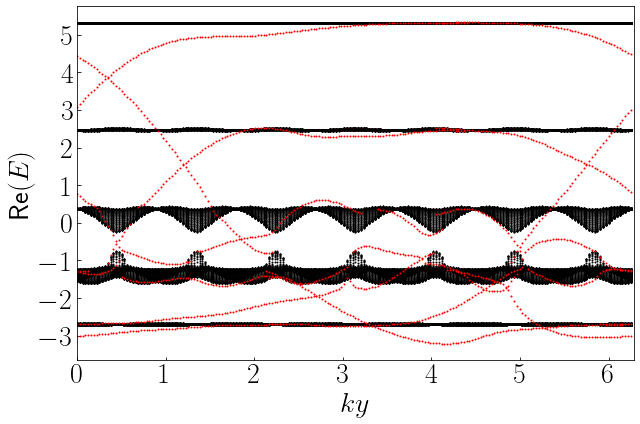

In [11]:
plt.figure(figsize=(9, 6))

plt.plot(ky_array, real_spectrum_array, 'k.', markersize=2)
plt.plot(ky_array_edge_perturb, real_spectrum_array_edge_perturb, 'r.', markersize=2)
plt.ylabel(r'$\text{Re}(E)$',fontsize=28)
plt.xlabel(r'$ky$',fontsize=28)
plt.xticks(fontsize=28)
plt.yticks([-3,-2,-1,0,1,2,3,4,5],fontsize=28)
plt.xlim([-0.001,2*np.pi])
plt.tight_layout()# adjust the fig to avoid cut off in ylabel

plt.savefig('nH_Hofstadter_Q_200_delta_0_5_IQHE_perturbation_1.pdf')

plt.show()